# Fake Reviews Detection on Movie Reviews through Sentiment Analysis


### By Kavin Kumar, Nalinraj, N Nanda Kishore Reddy, T Hemaachandhan

-----------------

### Problem Statement

--------------------


##### Sentiment analysis or opinion mining is a natural language processing (NLP) technique used to determine the polarity of a given text - whether it is positive, negative, or neutral.
##### One of the main issues under sentiment analysis is the extraction of emotions from opinion reviews and identification of fake positive and fake negative reviews from them.


------------
#### Importing Libraries
------------

In [1]:
import pandas as pd
import re,string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from xgboost.sklearn import XGBClassifier
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kavin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kavin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

----------
#### Importing the Dataset 
-----------

In [2]:
data = pd.read_csv(r"C:\Users\kavin\Desktop\PCL 6th sem\APPLICATION\Fake-Reviews-Detection-on-Movie-Reviews-through-Sentiment-Analysis\IMDB Dataset.csv")

print(data.describe)

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>


------------
#### Changing the target variables
-----------

##### '1' represents positive review and '0' represents negative review

In [3]:
data.sentiment=data.sentiment.apply(lambda x: 0 if x=='negative' else 1)

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


--------------
# Feature Engineering
-----------------

#### Indirect Features
##### This includes features that are derived from the dataset like:-

*   Number of Sentences
*   Number of Words
*   Number of Unique Words
*   Number of Punctuation Marks
*   Number of Uppercase Words
*   Number of Stop Words
*   Average length of a word






In [4]:
eng_stopwords = set(stopwords.words("english"))

data['count_sent']=data["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

data['count_word']=data["review"].apply(lambda x: len(str(x).split()))

data['count_unique_word']=data["review"].apply(lambda x: len(set(str(x).split())))

data['count_letters']=data["review"].apply(lambda x: len(str(x)))

data["count_punctuations"] =data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

data["mean_word_len"] = data["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

data['word_unique_percent']=data['count_unique_word']*100/data['count_word']

data['punct_percent']=data['count_punctuations']*100/data['count_word']

data['word_unique_percent']=data['count_unique_word']*100/data['count_word']

data['punct_percent']=data['count_punctuations']*100/data['count_word']

data = data[['review', 'count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len',
       'word_unique_percent', 'punct_percent','sentiment']]

data.head()

,review,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent,sentiment
0,One of the other reviewers has mentioned that ...,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166,1
1,A wonderful little production. <br /><br />The...,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494,1
2,I thought this was a wonderful way to spend ti...,1,166,121,926,40,3,20,76,4.584337,72.891566,24.096386,1
3,Basically there's a family where a little boy ...,1,138,96,748,42,3,13,62,4.427536,69.565217,30.434783,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,152,1317,56,1,31,96,4.730435,66.086957,24.347826,1


---------
### Visualisation of Data for Identifying Classification Approach
-------------


#### 1) Visualisation of Word Count 

> Shows histograms to observe patterns in positive and negative reviews based on word count.



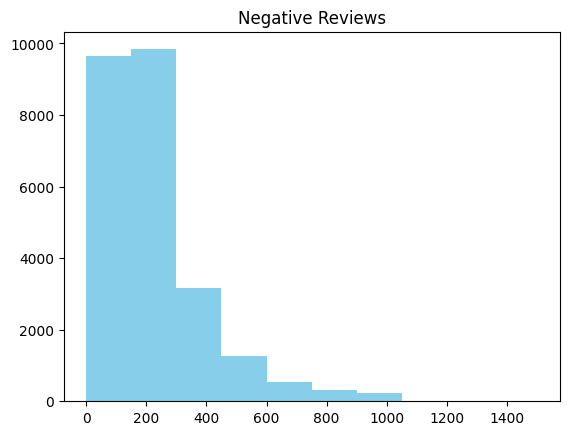

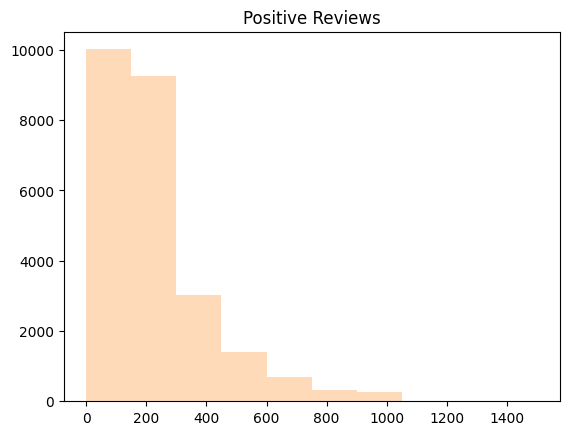

In [5]:
plt.hist(data[data['sentiment']==0]['count_word'],range=(0,1500),color='SkyBlue')
plt.title('Negative Reviews')
plt.show()

plt.hist(data[data['sentiment']==1]['count_word'],range=(0,1500),color='PeachPuff')
plt.title('Positive Reviews')
plt.show()

#### Summary of all  features of the dataset.
> Upon investigation, it can be inferred that there isn't a feature in the dataset that can be used to train a classification model. The classification model thus has to be built using word vectorizer and count vectorizer.

In [6]:
data.groupby(['sentiment'],as_index=False).mean()

,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0,1.0,229.46456,152.2662,1294.06436,53.59836,5.14632,24.72780,103.38132,4.623461,70.896372,23.447622
1,1,1.0,232.84932,152.0156,1324.79768,51.55876,4.56928,27.96804,104.31900,4.657892,70.164729,22.077985


----------
### Preprocessing of Reviews
----------
#### In this section of the notebook we preprocessed the data before building the classification model. We implemented the following functions to clean the data before model building.

* Removal of Punctuation Marks
* Cleaning Contractions
* Eliminated Stop Words
* Removal of HTML tags and URLs
* Lemmatization

In [7]:
# Removing all punctuations from review
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", "don't" : "do not"}

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(review):
    return review.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def clean_contractions(review, mapping):
    specials = ["’", "‘", "´", "`", "_"]
    for s in specials:
        if s == "_":
          review = review.replace(s, " ")
        else:
          review = review.replace(s, "'")
    review = ' '.join([mapping[t] if t in mapping else t for t in review.split(" ")])
    return review


from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(review):
    return " ".join([word for word in str(review).split() if word not in STOPWORDS])

def word_replace(review):
    return review.replace('<br />','')


from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(review):
    return " ".join([stemmer.stem(word) for word in review.split()])


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(review):
    return " ".join([lemmatizer.lemmatize(word) for word in review.split()])


def remove_urls(review):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', review)


def remove_html(review):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', review)


def preprocess(review):
    review=clean_contractions(review,mapping)
    review=review.lower()
    review=word_replace(review)
    review=remove_urls(review)
    review=remove_html(review)
    review=remove_stopwords(review)
    review=remove_punctuation(review)
    # review=stem_words(review)
    review=lemmatize_words(review)
    
    return review

In [8]:
data["review_p"] = data["review"].apply(lambda review: preprocess(review))

In [9]:
print(data[['review', 'review_p']])

                                                  review  \
0      One of the other reviewers has mentioned that ...   
1      A wonderful little production. <br /><br />The...   
2      I thought this was a wonderful way to spend ti...   
3      Basically there's a family where a little boy ...   
4      Petter Mattei's "Love in the Time of Money" is...   
...                                                  ...   
49995  I thought this movie did a down right good job...   
49996  Bad plot, bad dialogue, bad acting, idiotic di...   
49997  I am a Catholic taught in parochial elementary...   
49998  I'm going to have to disagree with the previou...   
49999  No one expects the Star Trek movies to be high...   

                                                review_p  
0      one reviewer mentioned watching 1 oz episode h...  
1      wonderful little production filming technique ...  
2      thought wonderful way spend time hot summer we...  
3      basically family little boy jake thi

--------------
### Evaluation Metric
-------------
1. **Accuracy** represents the number of correctly classified data instances over the total number of data instances.

2. **Precision** quantifies the number of positive class predictions that actually belong to the positive class. 

3. **Recall** quantifies the number of positive class predictions made out of all positive examples in the dataset.

4. **F1-score** is a metric which takes into account both precision and recall.




In [10]:
def metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)
    

---------
### Model based on Indirect Features
-----------
#### Features a Logistic Regression Model that uses Indirect features defined earlier to classify movie reviews into their respective labels

In [11]:
X=data[['count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len',
       'word_unique_percent', 'punct_percent']]
y=data['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
classifier = LogisticRegression(C=0.1, solver='sag')
classifier.fit(X_train, y_train)
metrics(classifier,X_test,y_test)

#### As expected, the classification model performed poorly and gave an accuracy of just 58%. We then proceeded to using TextBlob which is a Lexicon-based sentiment analyzer, for training the classification model.

-------
### N-gram Analysis
-----------

#### In this section we tried to identify the most suitable value of N in ngram_range parameter of the word and count vectorizer present in sklearn library. 


In [ ]:
reviews = ' '.join(data['review_p'])
string = reviews.split(" ")

In [ ]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:7]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (10,5))
    return sns.barplot(x='count',y='word', data=n_gram_df)

*N-gram N = 1*

In [ ]:
draw_n_gram(string,1)

*N-gram N = 2*

In [ ]:
draw_n_gram(string,2)

*N-gram N = 3*

In [ ]:
draw_n_gram(string,3)

#### Upon investigation, Trigram seemed the most suitable appropriate for our usecase and we chose ngram_range = (1,3) for our vectorizers.

--------
#### Frequency Based Vectorization
---
#### This involves the mapping of a word using a dictionary to a vector.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data['review_p'], data['sentiment'], test_size=0.2,random_state=0)

In [13]:
[i.shape for i in [X_train, X_test, y_train, y_test] ]

[(40000,), (10000,), (40000,), (10000,)]

In [14]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=10000
)

word_vectorizer.fit(data['review_p'])

tfidf_train = word_vectorizer.transform(X_train)
tfidf_test = word_vectorizer.transform(X_test)

In [15]:
print('Shape of tfidf_train:',tfidf_train.shape)
print('Shape of tfidf_test:',tfidf_test.shape)

Shape of tfidf_train: (40000, 10000)
Shape of tfidf_test: (10000, 10000)


In [ ]:
cv=CountVectorizer(analyzer = 'word', token_pattern = r'\w{1,}',ngram_range=(1,3),max_features=10000)
cv.fit(data['review_p'])
cv_train=cv.transform(X_train)
cv_test=cv.transform(X_test)

In [ ]:
print('Shape of cv_train:',cv_train.shape)
print('Shape of cv_test:',cv_test.shape)

In [ ]:
# Logistic Regression with TF-IDF
classifier = LogisticRegression(penalty='l2',C=0.5, solver = 'newton-cg')
classifier.fit(tfidf_train, y_train)
metrics(classifier,tfidf_test,y_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB

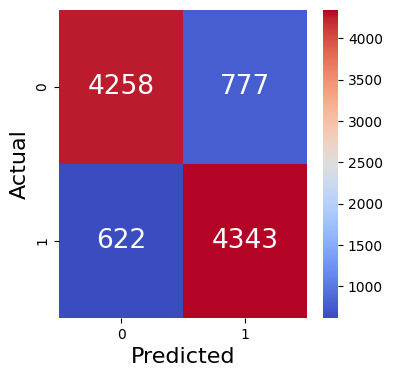


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5035
           1       0.85      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [17]:
#Naive Bayes with TF-IDF
#Model which we use
model= MultinomialNB()

model.fit(tfidf_train, y_train)
metrics(model,tfidf_test,y_test)

In [ ]:
#Naive Bayes with Count Vectorizer
modela= MultinomialNB()

modela.fit(cv_train, y_train)
metrics(modela,cv_test,y_test)

In [ ]:
#Default XGBoost Model with TF_IDF
model = XGBClassifier() 
model.fit(tfidf_train, y_train)

metrics(model,tfidf_test,y_test)

In [ ]:
#Default XGBoost Model with Count Vectorizer
modelcv = XGBClassifier() 
modelcv.fit(cv_train, y_train)

metrics(modelcv,cv_test,y_test)


In [ ]:
#SVM with TF-IDF
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(penalty='l2')
linear_svc.fit(tfidf_train, y_train)
metrics(linear_svc,tfidf_test,y_test)

In [ ]:
#SVM with Count Vectorizer
linear_svc1 = LinearSVC(C=0.1, random_state=20000)
linear_svc1.fit(cv_train, y_train)

metrics(linear_svc1,cv_test,y_test)

#### Logistic Regression using word vectorizer and SVM using word vectorizer gave the largest accuracy of 89% for the given dataset.

In [19]:
from sklearn import pipeline

In [21]:
model_pipe = pipeline.Pipeline([('wv',word_vectorizer),('model',model)])

In [22]:
model_pipe

Pipeline(steps=[('wv',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 3),
                                 stop_words='english', strip_accents='unicode',
                                 sublinear_tf=True, token_pattern='\\w{1,}')),
                ('model', MultinomialNB())])

In [23]:
import pickle

In [24]:
new_file = open('model.pkl','wb')
pickle.dump(model_pipe,new_file)
new_file.close()

In [25]:
print(X_train[0]==data['review_p'][0])

True


In [ ]:
print(data['review_p'][0])

In [43]:
res = model_pipe.predict(X_test)[1]
if res==0:
    print("The review is Fake")
else:
    print("The review is genuine")

The review is Fake


In [39]:
print(X_test,y_test)

11841    john cassavetes run law bottom heap see negro ...
19602    movie lame that movie unnecessary need another...
45519    well ethel water 7yearold sammy davis jr here ...
25747    find alan jacob review accurate concerning mov...
42642    movie simply awesome hilarious although skatin...
                               ...                        
25091    terrible script manage attract cast ridiculous...
27853    invited view film small art museum screening c...
47278    first allthere detective storylégitime défense...
37020    movie grabbed incredible opening sequence tric...
2217     saw film sxsw director attendance quite people...
Name: review_p, Length: 10000, dtype: object 11841    1
19602    0
45519    0
25747    1
42642    1
        ..
25091    0
27853    0
47278    1
37020    1
2217     0
Name: sentiment, Length: 10000, dtype: int64
